In [1]:
%pylab inline

import seaborn as sns
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [63]:
import nengo
import nengolib

def go(n_neurons=10, perturb=0, perturb_T=0.001, T=10.0, dt=0.001, tau=0, tau_probe=1.0,
       neuron_type=nengo.LIF(), dimensions=1, seed=0, num_samples=1000):
    sample_every = max(T / float(num_samples), dt)
    
    with nengolib.Network(seed=seed) as model:
        stim = nengo.Node(output=lambda t: perturb if t <= perturb_T else 0)
        x = nengo.Ensemble(n_neurons, dimensions, neuron_type=neuron_type, seed=seed)
        nengo.Connection(x, x, synapse=tau)  #solver=nengo.solvers.LstsqL2(reg=0.1))
        nengo.Connection(stim, x[0], synapse=None)

        p_voltage = nengo.Probe(x.neurons, 'voltage', sample_every=sample_every)
        p_x = nengo.Probe(x, synapse=tau_probe, sample_every=sample_every)
        
    with nengo.Simulator(model, dt=dt, seed=seed) as sim:
        sim.run(T)
        
    return sim.trange(dt=sample_every), sim.data[p_voltage], sim.data[p_x]

neuron_type = nengo.LIF()  #tau_ref=0.002)
dimensions = 2
seed = 1
t, v1, x1 = go(neuron_type=neuron_type, dimensions=dimensions, seed=seed)
_, v2, x2 = go(perturb=1e-15, neuron_type=neuron_type, dimensions=dimensions, seed=seed)

Building finished in 0:00:01.                                                   
Simulating finished in 0:00:05.                                                 
Building finished in 0:00:01.                                                   
Simulating finished in 0:00:05.                                                 


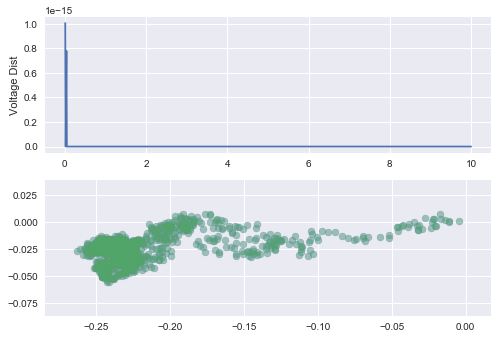

In [64]:
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(t, np.linalg.norm(v1 - v2, axis=1))
ax1.set_ylabel("Voltage Dist")

if dimensions == 1:
    ax2.plot(t, x1)
    ax2.plot(t, x2)
    #ax2.set_ylim(-1, 1)
    ax2.set_ylabel("Decoding")
    ax2.set_xlabel("Time (s)")
elif dimensions == 2:
    ax2.scatter(*x1.T, alpha=0.3)
    ax2.scatter(*x2.T, alpha=0.3)

pylab.show()

In [85]:
T = 5000.0
dt = 0.001
num_samples = 10000 # T/dt
t, v, x = go(T=T, dimensions=3, dt=dt, num_samples=num_samples, seed=seed)

Building finished in 0:00:01.                                                   ####################   Building... 33%                        ] ETA: 0:00:01
Simulating finished in 0:25:37.                                                 


In [86]:
v_sample = v[np.random.choice(len(v), size=100, replace=False)]

eps = np.sqrt(n_neurons) * 10**(-np.linspace(0., 5., 40))
data = np.zeros_like(eps)

for v_i in v_sample:
    dist = np.linalg.norm(v - v_i[None, :], axis=1)
    for i in range(len(eps)):
        data[i] += np.count_nonzero(dist <= eps[i])
data /= len(v_sample)

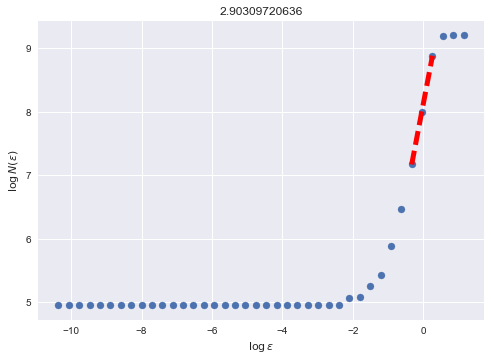

10000.0


In [89]:
i = 5
j = 3

X = np.log(eps)
Y = np.log(data)

pylab.figure()
pylab.title((Y[j] - Y[i]) / (X[j] - X[i]))
pylab.scatter(X, Y)
pylab.plot((X[i], X[j]), (Y[i], Y[j]), linestyle='--', lw=5, c='r')
pylab.xlabel(r"$\log \, \epsilon$")
pylab.ylabel(r"$\log \, N(\epsilon)$")
pylab.show()

assert np.allclose(data[0], len(t))
print data[0]

###### def box_count(x, eps):
    # https://en.wikipedia.org/wiki/Minkowski%E2%80%93Bouligand_dimension
    return len(set(tuple(h) for h in np.asarray(x / eps, dtype=int)))

eps = 10**(-1-np.arange(10.))
data = np.empty_like(eps)

print v.shape, v.min(), v.max()

for i in range(len(eps)):
    print eps[i]
    data[i] = box_count(v, eps[i])

0.558409591779
0.210828849836
1.63801240323


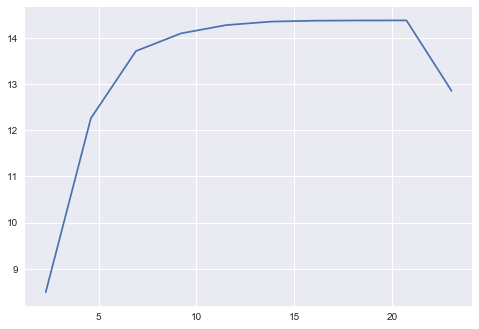

In [29]:
# http://www.wahl.org/fe/HTML_version/link/FE4W/c4.htm#box
# http://connor-johnson.com/2014/03/04/fractal-dimension-and-box-counting/

n_neurons = 10
#r = np.log(1 / eps**(n_neurons - 1))
#r = -(n_neurons - 1)*np.log(eps)
r = -np.log(eps)
N = np.log(data)

print N[-1] / r[-1]
print (N[-1] - N[0]) / (r[-1] - r[0])
print (N[1] - N[0]) / (r[1] - r[0])

pylab.figure()
pylab.plot(r, N)
pylab.show()

c:\users\aaron\appdata\local\enthought\canopy\user\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


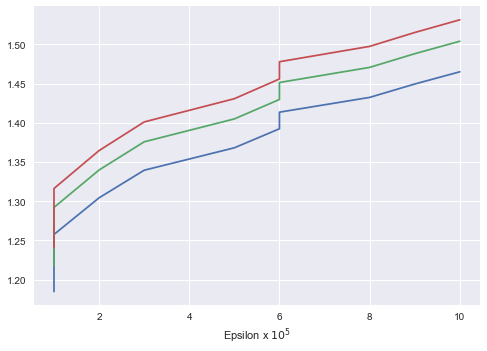

In [144]:
import pandas as pd

exp = int(-np.log(eps[-1]) / np.log(10) + 1e-15)
df = pd.DataFrame(data, index=t[cutoffs], columns=map(int, eps*10**exp))

pylab.figure()
#sns.heatmap(df)
pylab.plot(df.T)btw 
pylab.xlabel("Epsilon x $10^{%d}$" % exp)
#pylab.ylabel("Time (s)")
pylab.legend()
pylab.show()

In [162]:
N = data * np.log(1 / eps)[None, :]



i = 2
print (np.log(1 / eps[0]) - np.log(1 / eps[-1])) / (N[i][0] - N[i][-1])

12.8092324683


In [150]:
print (data[i][0] - data[i][-1])

0.290642946533


In [151]:
print eps[0] - eps[-1]

9e-05
